In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#plt.style.use('')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head()

,Unnamed: 0,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,2015-08-17 15:09:00,139.0,41.0,92.0,140.0
1,1,2015-08-17 15:10:00,144.0,40.0,92.0,140.0
2,2,2015-08-17 15:11:00,140.0,42.0,89.0,144.0
3,3,2015-08-17 15:12:00,138.0,45.0,93.0,141.0
4,4,2015-08-17 15:13:00,133.0,42.0,94.0,134.0


In [ ]:
df['Timestamp (GMT)'] = pd.to_datetime(df['Timestamp (GMT)'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  226 non-null    int64         
 1   Timestamp (GMT)             226 non-null    datetime64[ns]
 2   Lifetouch Heart Rate        226 non-null    float64       
 3   Lifetouch Respiration Rate  226 non-null    float64       
 4   Oximeter SpO2               226 non-null    float64       
 5   Oximeter Pulse              226 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 10.7 KB


In [ ]:
cols = ['Lifetouch Respiration Rate','Oximeter SpO2','Oximeter Pulse','Unnamed: 0']
df.drop(cols,axis=1, inplace=True)
df.head()

,Timestamp (GMT),Lifetouch Heart Rate
0,2015-08-17 15:09:00,139.0
1,2015-08-17 15:10:00,144.0
2,2015-08-17 15:11:00,140.0
3,2015-08-17 15:12:00,138.0
4,2015-08-17 15:13:00,133.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp (GMT)       226 non-null    datetime64[ns]
 1   Lifetouch Heart Rate  226 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [ ]:
df = df.set_index('Timestamp (GMT)')
df.index

DatetimeIndex(['2015-08-17 15:09:00', '2015-08-17 15:10:00',
               '2015-08-17 15:11:00', '2015-08-17 15:12:00',
               '2015-08-17 15:13:00', '2015-08-17 15:14:00',
               '2015-08-17 15:15:00', '2015-08-17 15:16:00',
               '2015-08-17 15:17:00', '2015-08-17 15:18:00',
               ...
               '2015-08-17 18:45:00', '2015-08-17 18:46:00',
               '2015-08-17 18:47:00', '2015-08-17 18:48:00',
               '2015-08-17 18:49:00', '2015-08-17 18:50:00',
               '2015-08-17 18:51:00', '2015-08-17 18:52:00',
               '2015-08-17 18:53:00', '2015-08-17 18:54:00'],
              dtype='datetime64[ns]', name='Timestamp (GMT)', length=226, freq=None)

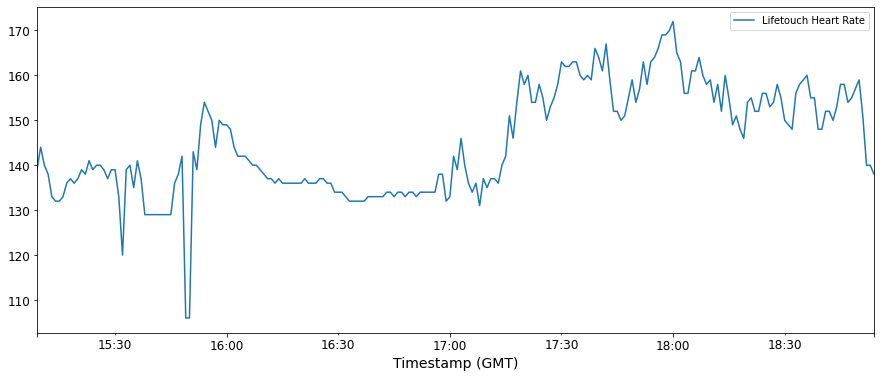

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

ARIMA, short for ‘Auto-Regressive Integrated Moving Average’ is a class of models that 
‘explains’ a given time series based on its own past values, that is, its own lags and the lagged 
forecast errors, so that equation can be used to forecast future values.
Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be 
modelled with ARIMA models.
The initial order of the ARIMA model can be determined using the ACF and PACF plots. The 
initial starting point for 'p' is the number of significant lags from the PACF plot and 'q' comes 
from the number of significant lags from the ACF plot

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2882.1251069896543
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2486.1571670187914
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1581.138829786437
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1476.6600352195044
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1589.020389294922
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1557.1025816248593
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.5136372632537
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1480.9732424490617
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2569.4704637944237
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2195.499330267697
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1448.2212131752156
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1330.9017915552713
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1462.923502130573
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1407.4671227480899
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1353.4125250258871
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1341.2409592923052
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1368.3426470905333
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1306.0632627730

In [ ]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12) 1231.16

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6329      0.138      4.579      0.000       0.362       0.904
ma.L1         -0.8565      0.105     -8.129      0.000      -1.063      -0.650
ma.S.L12      -1.0980      0.104    -10.603      0.000      -1.301      -0.895
sigma2        21.1788      2.805      7.550      0.000      15.681      26.677


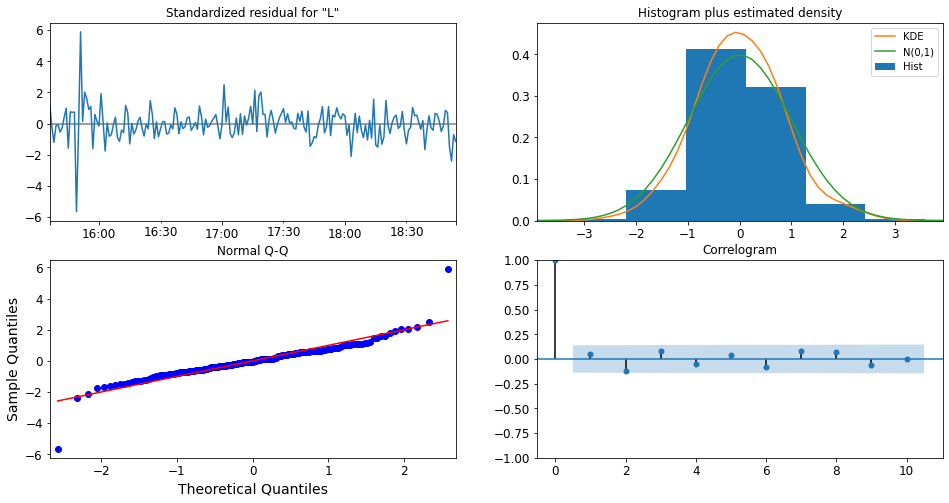

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


The standardized residual errors appear to exhibit a uniform variance and fluctuate around a mean of zero. The density plot suggests the errors are normally distributed with a mean of zero and the Q-Q plot confirms that all the dots fall perfectly in line with the red line. The ACF plot of the correlogram shows that the residual errors are not autocorrelated, indicating that the model is able to explain any patterns in the data. Therefore, we can confidently use this model to make predictions on new data and forecast future outcomes.

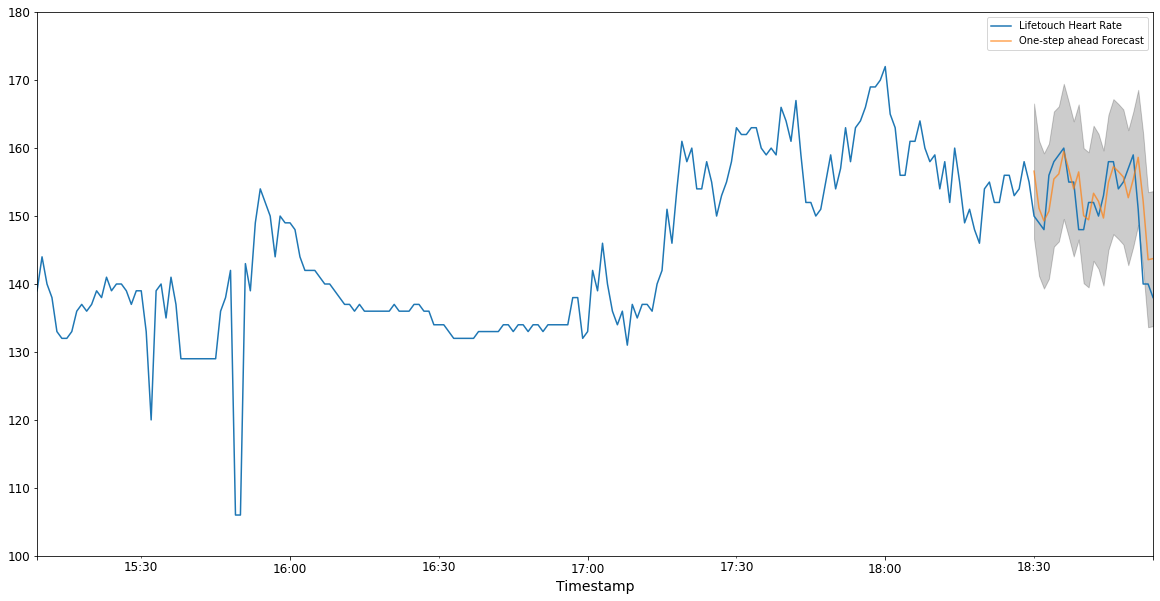

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-08-17 18:30:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2015-08-17 14:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Timestamp')
ax.set_ylabel('')
plt.legend()
plt.ylim(100,180)
plt.show()

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(226, 1)
(196, 1) (30, 1)


In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)


Timestamp (GMT)
2015-08-17 18:25:00    153.242854
2015-08-17 18:26:00    154.595550
2015-08-17 18:27:00    154.757620
2015-08-17 18:28:00    154.052423
2015-08-17 18:29:00    157.391246
2015-08-17 18:30:00    156.607121
2015-08-17 18:31:00    151.149648
2015-08-17 18:32:00    149.277544
2015-08-17 18:33:00    150.722281
2015-08-17 18:34:00    155.446610
2015-08-17 18:35:00    156.210134
2015-08-17 18:36:00    159.519592
2015-08-17 18:37:00    156.860626
2015-08-17 18:38:00    153.999717
2015-08-17 18:39:00    156.492719
2015-08-17 18:40:00    150.061210
2015-08-17 18:41:00    149.443346
2015-08-17 18:42:00    153.355731
2015-08-17 18:43:00    152.158419
2015-08-17 18:44:00    149.707081
2015-08-17 18:45:00    154.960067
2015-08-17 18:46:00    157.269811
2015-08-17 18:47:00    156.562867
2015-08-17 18:48:00    155.754698
2015-08-17 18:49:00    152.700117
2015-08-17 18:50:00    155.403539
2015-08-17 18:51:00    158.637950
2015-08-17 18:52:00    152.196657
2015-08-17 18:53:00    143.57659

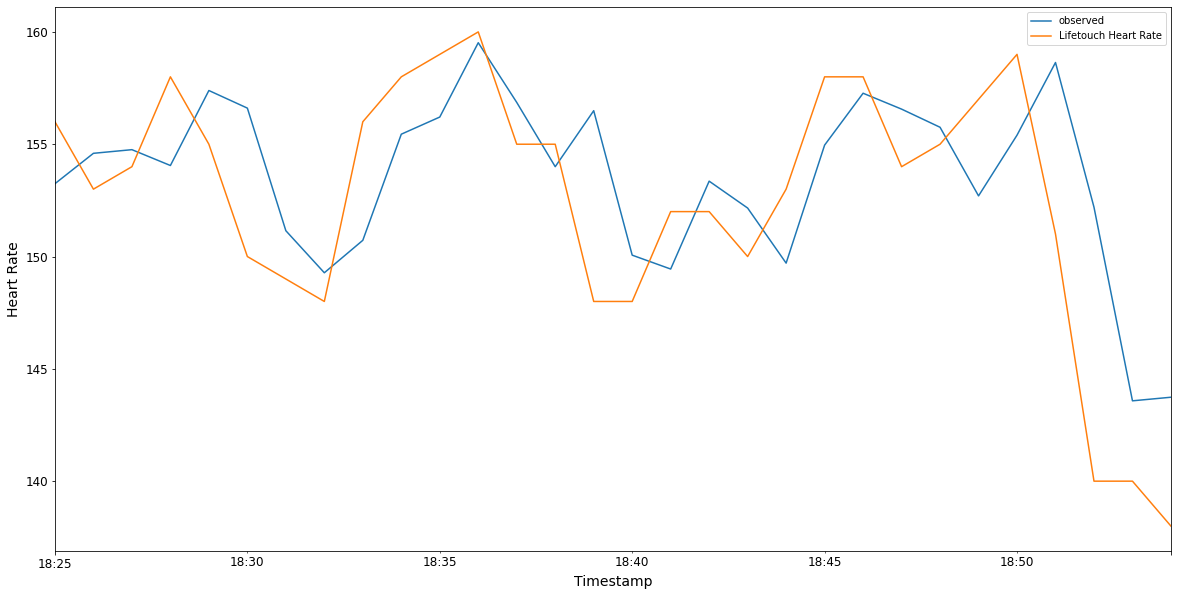

In [ ]:
plt.figure(figsize=(20, 10))
pred.plot(legend=True,label='observed')
test['Lifetouch Heart Rate'].plot(legend=True)
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()

plt.show()

In [ ]:
test['Lifetouch Heart Rate'].mean()

152.63333333333333

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Lifetouch Heart Rate']))
print(rmse)

4.203831688722875


In [ ]:
mae = mean_absolute_error(pred,test['Lifetouch Heart Rate'])
print(mae)

3.3165092344609604


Using the best time series model ARIMA, we will make forecasts (Future Predictions) and save the predictions to a .csv file named predictions.csv.


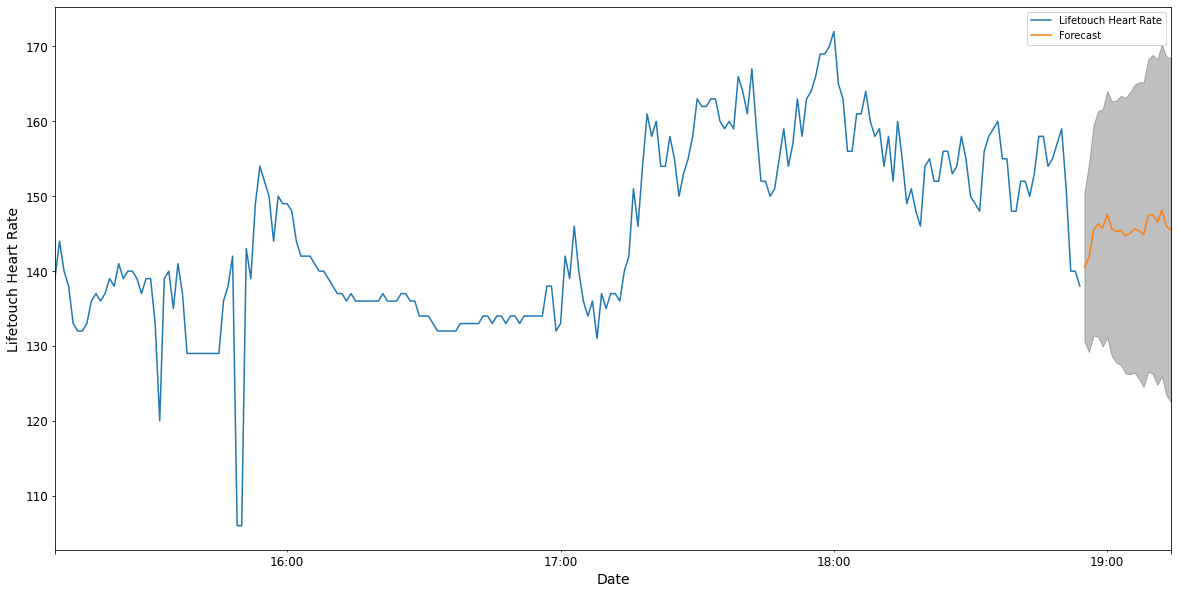

In [ ]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Lifetouch Heart Rate')

plt.legend()
plt.show()

In [ ]:
forecasts = results.forecast(steps=20)
print(forecasts)

2015-08-17 18:55:00    140.548965
2015-08-17 18:56:00    141.779847
2015-08-17 18:57:00    145.461599
2015-08-17 18:58:00    146.316808
2015-08-17 18:59:00    145.743796
2015-08-17 19:00:00    147.609591
2015-08-17 19:01:00    145.680305
2015-08-17 19:02:00    145.270998
2015-08-17 19:03:00    145.448009
2015-08-17 19:04:00    144.742557
2015-08-17 19:05:00    145.040112
2015-08-17 19:06:00    145.648533
2015-08-17 19:07:00    145.400935
2015-08-17 19:08:00    144.861931
2015-08-17 19:09:00    147.423560
2015-08-17 19:10:00    147.569867
2015-08-17 19:11:00    146.548206
2015-08-17 19:12:00    148.130062
2015-08-17 19:13:00    146.021076
2015-08-17 19:14:00    145.498041
Freq: T, Name: predicted_mean, dtype: float64


In [ ]:
forecasts.to_csv('predictions.csv')

In [ ]:
df1 = pd.read_csv("predictions.csv")

In [ ]:
df1.head()

,Unnamed: 0,predicted_mean
0,2015-08-17 18:55:00,140.548965
1,2015-08-17 18:56:00,141.779847
2,2015-08-17 18:57:00,145.461599
3,2015-08-17 18:58:00,146.316808
4,2015-08-17 18:59:00,145.743796


In [ ]:
df1.rename(columns={'Unnamed: 0': 'Time', 'predicted_mean': 'Predictions'}, inplace=True)


df1.columns = ['Time', 'Predictions']

In [ ]:
df1.head(20)

,Time,Predictions
0,2015-08-17 18:55:00,140.548965
1,2015-08-17 18:56:00,141.779847
2,2015-08-17 18:57:00,145.461599
3,2015-08-17 18:58:00,146.316808
4,2015-08-17 18:59:00,145.743796
5,2015-08-17 19:00:00,147.609591
6,2015-08-17 19:01:00,145.680305
7,2015-08-17 19:02:00,145.270998
8,2015-08-17 19:03:00,145.448009
9,2015-08-17 19:04:00,144.742557


In [ ]:
import json

# Create list of prediction values 
predict = [140.5489653406,141.7798468748,
           145.4615986934,146.3168077404,
           145.7437956478,147.6095912294,
           145.680305042,145.2709981726,
           145.4480088175,144.7425567217,
           145.040111771,145.6485326248,
           145.4009347443,144.8619309834,
           147.4235600978,147.5698673443,
           146.5482064019,148.1300616828,
           146.0210757271,145.4980407021]

# Create a list of dictionaries with prediction values 
result = [{"prediction": prediction} for prediction in predict]

# Print the list of dictionaries
print(json.dumps(result, indent = 0))

with open('predictions.json', 'w') as f:
    json.dump(result, f, indent=0)

[
{
"prediction": 140.5489653406
},
{
"prediction": 141.7798468748
},
{
"prediction": 145.4615986934
},
{
"prediction": 146.3168077404
},
{
"prediction": 145.7437956478
},
{
"prediction": 147.6095912294
},
{
"prediction": 145.680305042
},
{
"prediction": 145.2709981726
},
{
"prediction": 145.4480088175
},
{
"prediction": 144.7425567217
},
{
"prediction": 145.040111771
},
{
"prediction": 145.6485326248
},
{
"prediction": 145.4009347443
},
{
"prediction": 144.8619309834
},
{
"prediction": 147.4235600978
},
{
"prediction": 147.5698673443
},
{
"prediction": 146.5482064019
},
{
"prediction": 148.1300616828
},
{
"prediction": 146.0210757271
},
{
"prediction": 145.4980407021
}
]


In [ ]:
import json

predictions = [140.5489653406,141.7798468748,
           145.4615986934,146.3168077404,
           145.7437956478,147.6095912294,
           145.680305042,145.2709981726,
           145.4480088175,144.7425567217,
           145.040111771,145.6485326248,
           145.4009347443,144.8619309834,
           147.4235600978,147.5698673443,
           146.5482064019,148.1300616828,
           146.0210757271,145.4980407021]

data = []
for pred in predictions:
    data.append({'prediction': pred})

print(data[0:2])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'prediction': 140.5489653406}, {'prediction': 141.7798468748}]


In [ ]:
#df1.to_json("predictions.json")